**Table of contents**<a id='toc0_'></a>    
- 1. [AS-AD for an open economy](#toc1_)    
- 2. [Analytical solution](#toc2_)    
- 3. [Numerical solution and calibration of model](#toc3_)    
- 4. [Further analysis (ideas)](#toc4_)    
- 5. [Conclusion](#toc5_)    


In [28]:
%load_ext autoreload
%autoreload 2

from types import SimpleNamespace
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

from test_chris import ASADClass 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[AS-AD for an open economy](#toc0_)


In our model project, we model the the AS-AD model for an small, open economy,  first with a fixed exchange rate and second with a floating exchange rate.

Firstly, we define **output and inflation gaps**:


1. **Output gap:** $$\hat{y}_{t} = y_t-\bar{y}$$
2. **Inflation gap:** $$\hat{\pi}_{t} = \pi_t-\pi^{\ast}$$

The model equations are given by the following:
1. **1 - AD-curve under fixed exchange rates:** $$\hat{y}_{t} = \beta_1 (e^r_{t-1}-\hat{\pi}_{t}) + z_t \Leftrightarrow$$
$$\hat\pi_t = e^r_{t-1}-\frac{1}{\beta_1}\hat{y}_t+\frac{z_t}{\beta_1} $$

1. **2 - AD-curve under floating exchange rates:** $$\hat{y}_{t} = \beta_1 e^r_{t-1}-\hat{\beta_1}\hat\pi_t + z_t \Leftrightarrow$$
$$\hat\pi_t = \frac{\beta_1}{\hat{\beta_1}} e^r_{t-1}-\frac{1}{\hat{\beta_1}} \hat{y}_t+\frac{z_t}{\hat{\beta_1}} $$ 
$$where\  \hat\beta_1 = \beta_1 + h\left(\frac{\beta_1}{\theta}+\beta_2\right)>\beta_1$$

2. **Short-Run AS curve:** $$\hat{\pi}_{t} = \gamma \hat{y}_{t}+ s_t$$

3. **Real Exchange rate:** $$ e^r_t = e^r_{t-1}-\hat\pi_t$$

4. **Demand shock:** $$z_{t} = \delta z_{t-1}+x_{t}, x_{t} \sim N(0,\sigma_x^2)$$

5. **Supply shock:** $$s_{t} = \omega s_{t-1}+c_{t}, c_{t} \sim N(0,\sigma_c^2)$$

It can be seen above that the economy with a fixed and floating exchange rate are equal when h = 0, as then $\hat\beta_1 = \beta_1$

## The floating exchange rate economy
The model can be rewritten by firstly inserting AS in AD and isolating for $e_{t-1}^r$:

$$
\hat{y}_t = \beta_1 e_{t-1}^r - \hat\beta_1 \gamma \hat{y}_t - \hat\beta_1 s_t + z_t \Leftrightarrow $$


$$
e_{t-1}^r = \frac{1+\hat\beta_1 \gamma}{\beta_1} \hat{y}_t + \frac{\hat\beta_1}{\beta} s_{t}-\frac{1}{\beta_1} z_t
$$

Inserting this in the exchange rate as well as AS we have:

$$
\frac{1+\hat\beta_1 \gamma}{\beta_1} \hat{y}_{t} + \frac{\hat\beta_1}{\beta} s_{t} - \frac{1}{\beta_1} z_{t} = \frac{1+\hat\beta_1 \gamma}{\beta_1} \hat{y}_{t-1} + \frac{\hat\beta_1}{\beta_1} s_{t-1} - \frac{1}{\beta_1} z_{t-1} - \gamma \hat{y}_{t-1} - s_{t-1} \Leftrightarrow
$$

$$
\frac{1+\hat\beta_1 \gamma}{\beta_1} \hat{y}_{t} = \frac{1+\gamma(\hat\beta_1-\beta_1)}{\beta_1} \hat{y}_{t-1} + \frac{1}{\beta_1} (z_{t} - z_{t-1}) -\frac{\hat\beta_1}{\beta_1} \left(s_{t}-s_{t-1}\left(1-\frac{\beta_1}{\hat\beta_1}\right)\right) \Leftrightarrow
$$

$$
\hat{y}_t = a(1+b)\hat{y}_{t-1} + a(z_t - z_{t-1}) - a\left(\hat\beta_1 s_{t}-s_{t-1}({\hat\beta_1-\beta_1})\right) \quad \text{(*)}
$$

Repeating the same steps for the inflation gap gives:

$$
\hat{\pi}_t = a(1+b)\hat{\pi}_{t-1} + a (s_t - s_{t-1}) + a\gamma(z_t - z_{t-1}) \quad \text{(**)}
$$

where 

$$
a = \frac{1}{1+\beta_1 \gamma}
$$
$$
b = \gamma(\hat\beta_1-\beta_1)
$$



## The fixed exchange rate economy
The model for the fixed exchange rate is a special case of the floating exchange rate economy, which is found by setting $\hat\beta_1 = \beta_1$. The model for the fixed exchange rate economy is:

$$
\hat{y}_t = a\hat{y}_{t-1} + a(z_t - z_{t-1}) - a\beta_1 s_t \quad \text{(***)}
$$

$$
\hat{\pi}_t = a \hat{\pi}_{t-1} + a (s_t - s_{t-1}) + a\gamma(z_t - z_{t-1}) \quad \text{(****)}
$$



In [60]:
model = ASADClass(fixed=False)
par = model.par
sim = model.sim
print(f'{par.a = :.4f}')
print(f'{par.b = :.4f}')

par.a = 0.7583
par.b = 0.2662


## 3. <a id='toc3_'></a>[Simulate](#toc0_)

In [61]:
model.simulate()

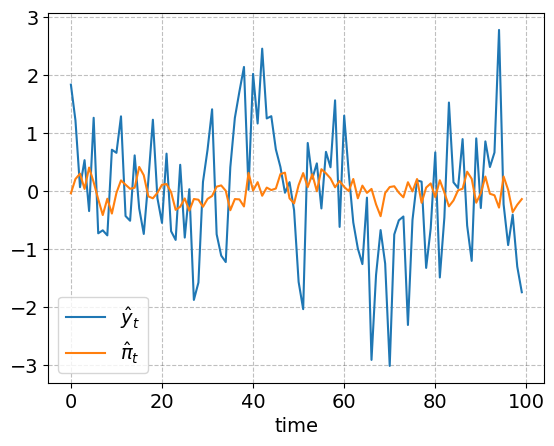

In [62]:
simT_fig = 100 # first 100 periods
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(simT_fig),sim.y_hat[:simT_fig],label='$\\hat{y}_t$')
ax.plot(np.arange(simT_fig),sim.pi_hat[:simT_fig],label='$\\hat{\pi}_t$')
ax.set_xlabel('time')
ax.legend(frameon=True);

In [63]:
model.calc_moms() # calculate moments from the simulation
error = model.calc_diff_to_data(do_print=True) # compares with the data

std_y       | data = 1.6400, model = 1.4098
std_pi      | data = 0.2100, model = 0.1781
corr_y_pi   | data = 0.3100, model = 0.0397
autocorr_y  | data = 0.8400, model = 0.6659
autocorr_pi | data = 0.4800, model = 0.2803
error =   0.19727604


In **business-cycle data** from the US/Denmark we have:
* Change data to denmark
1. $std(\hat{y}_t) = 1.64$
2. $std({\hat{\pi}}_t) = 0.21$
3. $corr(\hat{y}_t,{\hat{\pi}}_t) = 0.31$
4. $corr(\hat{y}_t,\hat{y}_{t-1}) = 0.84$
5. $corr({\hat{\pi}}_t,{\hat{\pi}}_{t-1}) = 0.48$

We now consider a **structural estimation**. 

**Principle:** Choose parameters to minimize the distance between data moments and simulated model moments.

**Objective:** A measure of the distance between model and data (involves a subjective choice of moments), here:

$$
\begin{align*}
g(\delta,\omega,\sigma_x,\sigma_c) = &\,\,(std(\hat{y}_t^{data}) - std(\hat{y}_t^{model}))^2 \\
& + (std({\hat{\pi}}_t^{data}) - std({\hat{\pi}}_t^{model}))^2 \\
& + (corr(\hat{y}_t^{data},{\hat{\pi}}_t^{data}) - corr(\hat{y}_t^{data},{\hat{\pi}}_t^{model}))^2 \\
& + (corr(\hat{y}_t^{data},\hat{y}_{t-1}^{data}) - corr(\hat{y}_t^{model},\hat{y}_{t-1}^{model}))^2 \\
& + (corr({\hat{\pi}}_t^{data},{\hat{\pi}}_{t-1}^{data}) - corr({\hat{\pi}}_t^{model},{\hat{\pi}}_{t-1}^{model}))^2 \\
\end{align*}
$$

**Minimization:** Choose the free parameters to minimize the objective, i.e.

$$
\min_{\delta,\omega,\sigma_x,\sigma_c} g(\delta,\omega,\sigma_x,\sigma_c)
$$

In [64]:
def obj(x,parnames,do_print=False):
    """ objective for choosing parameters """

    # a. update parameters
    for xval,parname in zip(x,parnames):
        par.__dict__[parname] = xval
        if do_print: print(f'{parname:10s} = {xval:.4f}')

    if do_print: print('')

    model.calc_compound_par()

    # b. simulate and calculate moments
    model.simulate()
    model.calc_moms()

    # c. compare with data
    error = model.calc_diff_to_data(do_print=do_print)

    return error

**Calculate objective at initial values:**

In [65]:
parnames = ['delta','omega','sigma_x','sigma_c']
x0 = [par.__dict__[parname] for parname in parnames]
error_ = obj(x0,parnames,do_print=True)

delta      = 0.8000
omega      = 0.1500
sigma_x    = 1.0000
sigma_c    = 0.2000

std_y       | data = 1.6400, model = 1.4098
std_pi      | data = 0.2100, model = 0.1781
corr_y_pi   | data = 0.3100, model = 0.0397
autocorr_y  | data = 0.8400, model = 0.6659
autocorr_pi | data = 0.4800, model = 0.2803
error =   0.19727604


**Estimate:**

In [66]:
bounds = ((0,1-1e-8),(0,1-1e-8),(0,None),(0,None))
res = optimize.minimize(obj,x0,bounds=bounds,method='Nelder-Mead',args=(parnames,))

In [68]:
res.success

True

In [69]:
error_ = obj(res.x,parnames,do_print=True)

delta      = 0.9546
omega      = 0.2334
sigma_x    = 0.8000
sigma_c    = 0.1744

std_y       | data = 1.6400, model = 1.6437
std_pi      | data = 0.2100, model = 0.1750
corr_y_pi   | data = 0.3100, model = 0.3070
autocorr_y  | data = 0.8400, model = 0.8412
autocorr_pi | data = 0.4800, model = 0.4786
error =   0.00124917


## 3. <a id='toc3_'></a>[Numerical solution and calibration of model](#toc0_)

## 4. <a id='toc4_'></a>[Further analysis (ideas)](#toc0_)

Impulse response to demand or supply shock. Errors are zero for all t.

Difference between y and y_hat for periods 1 to T. 

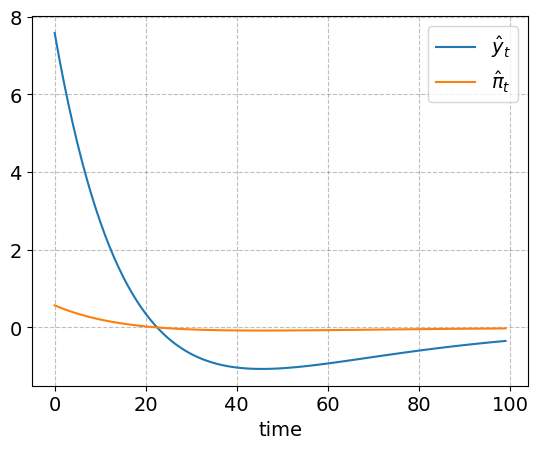

In [70]:
model.impulse_response(demand=True)
simT_fig = 100 # first 100 periods
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(simT_fig),sim.y_hat[:simT_fig],label='$\\hat{y}_t$')
ax.plot(np.arange(simT_fig),sim.pi_hat[:simT_fig],label='$\\hat{\pi}_t$')
ax.set_xlabel('time')
ax.legend(frameon=True);

## 5. <a id='toc5_'></a>[Conclusion](#toc0_)